In [ ]:
import numpy as np
import scipy.io
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [ ]:
data = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/IA 304/binaryalphadigs.mat')

In [ ]:
# data

In [ ]:
data['dat'][0].shape

(39,)

In [ ]:
# test = np.array([[1,2],[3,4],[5,6]])
# test

In [ ]:
# t = np.ones((2,1))
# t

In [ ]:
# test+t

In [ ]:
# np.append(test, [[4,5]], axis=0)

In [ ]:
# test.reshape((-1))

In [ ]:
# np.append(data['test0'],data['test1'],axis = 0).shape

In [ ]:
def lire_alpha_digit(list_index):
  subsample = []
  for i in list_index:
    n_sample = data['dat'][i].shape[0]
    for j in range(n_sample):
      tmp= data['dat'][i][j].reshape((-1))
      subsample.append(tmp)
  return np.array(subsample)

In [ ]:
lire_alpha_digit([10]).shape

(39, 320)

In [ ]:
class RBM:
  def __init__(self, p, q):
    self.w = np.random.normal(size=(p,q), scale = 0.01)
    self.a = np.zeros(shape=(1,p))  #visible unit   (n_feature)
    self.b = np.zeros(shape=(1,q))  #hidden unit    (n_component)

In [ ]:
def entre_sortie(RBM, data):
  return 1/(1+np.exp(- np.dot(data, RBM.w) + RBM.b))

In [ ]:
def sortie_entre(RBM, data):
  return 1/(1+np.exp(- np.dot(data, RBM.w.T) + RBM.a))

In [ ]:
def energy(RBM, x):
  en = (-np.dot(x,RBM.a.T) - np.logaddexp(0, np.dot(x, RBM.w) + RBM.b).sum(axis=1).reshape((-1,1))) #np.dot(RBM.b.T, h) - np.dot(x.T, np.dot(W,h))
  # print(en.shape)
  return en

In [ ]:
def log_logistic(x):
  return np.log(1/(1 + np.exp(-x)))

In [ ]:
def pseudo_loglike(RBM, x):
  ind = (np.arange(x.shape[0]), np.random.randint(0, x.shape[1], x.shape[0]))
  x_ = x.copy()
  x_[ind] = 1 - x_[ind]
  fe = energy(RBM, x)
  fe_ = energy(RBM, x_)
  return x.shape[1] * log_logistic(fe_ - fe)

In [ ]:
# err_list = []
def train(RBM, data, epoch, lr, minibatch):
  n,p = data.shape
  q = RBM.b.shape[1]
  err = 0
  bic = 0
  for i in range(0,epoch):
    np.random.shuffle(data)
    for b in range(0,n, minibatch):
      data_batch = np.copy(data[b:min(minibatch+b,n),:])
      nb = data_batch.shape[0]
      v0 = np.copy(data_batch)
      ph0 = entre_sortie(RBM, v0)
      h0 = (np.random.rand(nb,ph0.shape[1])<ph0)*1
      pv1 = sortie_entre(RBM,h0)
      v1 = (np.random.rand(nb,p)<pv1)*1
      ph1 = entre_sortie(RBM,v1)

      da = np.sum(v0 -v1, axis = 0)
      db = np.sum(ph0-ph1, axis =0)
      dw = np.dot(data_batch.T, ph0) - np.dot(v1.T, ph1)

      RBM.w += lr/nb * dw
      RBM.b += lr/nb * db
      RBM.a += lr/nb * da
    if i == (epoch-1):
    #here
      h = entre_sortie(RBM, data)
      x_rec = sortie_entre(RBM, h)
      err = mean_squared_error(data,x_rec)
      # err_list.append([i,err])
      # bic = n * np.log(err) + q * np.log(n)
      bic = n * pseudo_loglike(RBM, data).mean(axis=0)[0] + q * np.log(n)
      # print("iter {} with error {}".format(i,mean_squared_error(data,x_rec))) 
  return RBM, err, bic

In [ ]:
p = 320
# q = 100
epoch = 50
lr = 0.01
minibatch = 10 #39

In [ ]:
# model = RBM(p,q)  
# x = lire_alpha_digit([10]) #,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])

In [ ]:
# train(model, x, epoch, lr, minibatch)

In [ ]:
# pseudo_loglike(model, x).mean(axis=0)

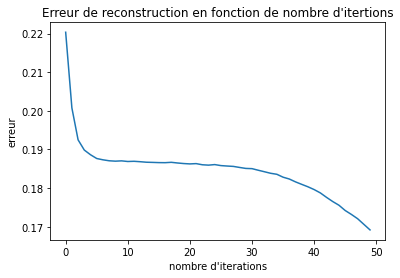

In [ ]:
# err_list = np.array(err_list)
# plt.plot(err_list[:,0], err_list[:,1])
# plt.xlabel("nombre d'iterations")
# plt.ylabel("erreur")
# plt.title("Erreur de reconstruction en fonction de nombre d'itertions")
# plt.show()

In [ ]:
def generer_image_RBM(RBM, nb_iter, nb_images):
  p, q = RBM.w.shape
  # for i in range(0, nb_images):
  #   v = (np.random.rand(p)<0.5)*1
  #   for iter in range(nb_iter):
  #     h = (np.random.rand(q)<entre_sortie(RBM,v))*1
  #     v = (np.random.rand(p)<sortie_entre(RBM,h))*1
  #   v = v.reshape((20,16))
  #   plt.imshow(v, cmap='Greys')
  #   plt.show()

  plt.clf()
  fig, axes = plt.subplots(1, nb_images, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(2*nb_images, 4))
  # fig.suptitle("reconstruct")
  text = axes[0].text(-7, 10,"q = " + str(q), size=15, verticalalignment='center', rotation=-270)
  # text = axes[1, 0].text(-7, 13,"reconstructed", size=15, verticalalignment='center', rotation=-270)
  for i in range(nb_images):
    v = (np.random.rand(p)<0.5)*1
    for iter in range(nb_iter):
      h = (np.random.rand(q)<entre_sortie(RBM,v))*1
      v = (np.random.rand(p)<sortie_entre(RBM,h))*1
    v = v.reshape((20,16))
    axes[i].imshow(v, cmap='Greys')
    # axes[0, i].imshow(v, cmap='gray')
    # axes[1, n].imshow(rbm.reconstruct(images[n].reshape(28*28)).reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    # axes[0, i].axis('off')
    # axes[1, n].axis('off')
  plt.show()
  plt.close()

In [ ]:
# generer_image_RBM(model, 1000, 5)

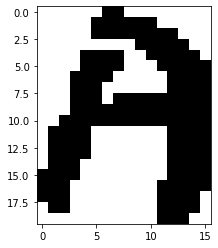

In [ ]:
plt.imshow(data['dat'][10][0], cmap='Greys')
plt.show()

********************i = 50*****************


<Figure size 432x288 with 0 Axes>

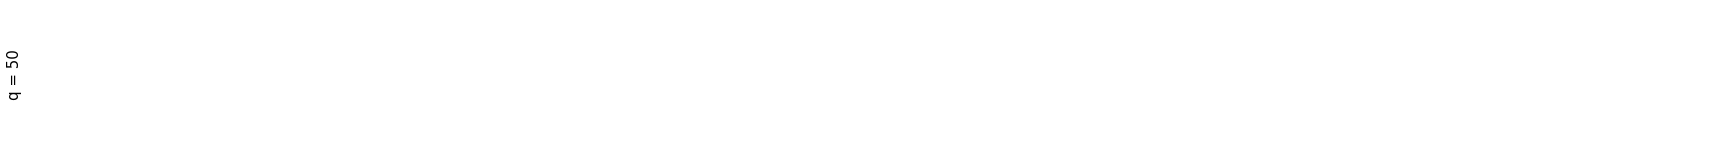

********************i = 100*****************


<Figure size 432x288 with 0 Axes>

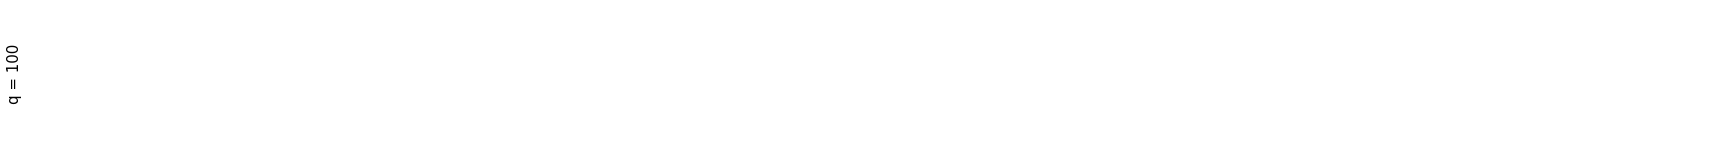

********************i = 150*****************


<Figure size 432x288 with 0 Axes>

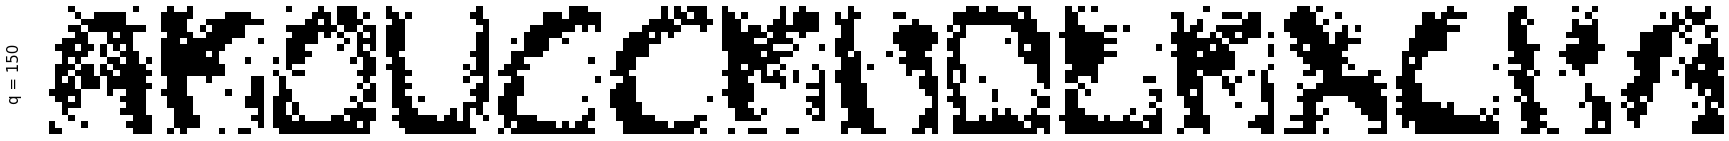

********************i = 200*****************


<Figure size 432x288 with 0 Axes>

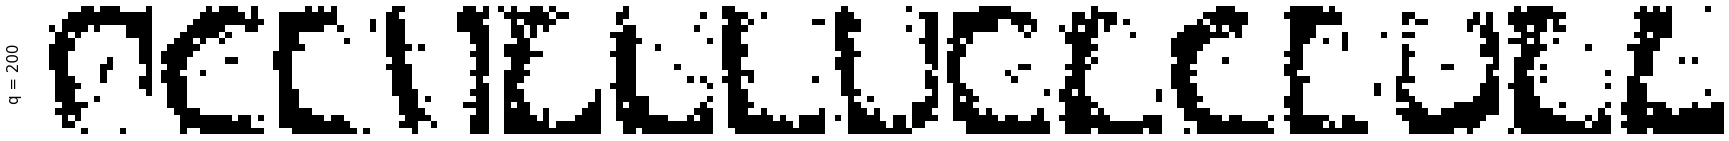

********************i = 250*****************


<Figure size 432x288 with 0 Axes>

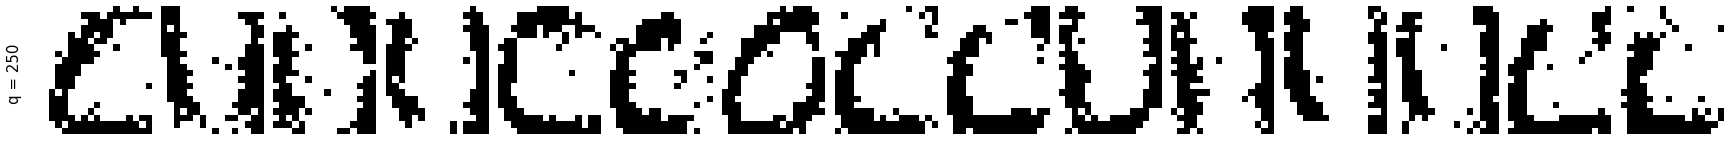

********************i = 300*****************


<Figure size 432x288 with 0 Axes>

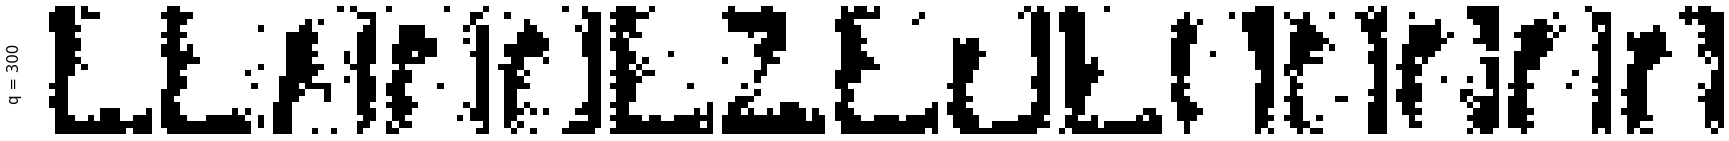

********************i = 350*****************


<Figure size 432x288 with 0 Axes>

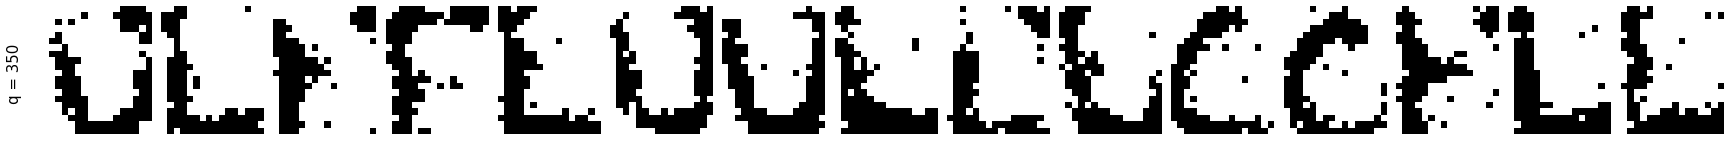

********************i = 400*****************


<Figure size 432x288 with 0 Axes>

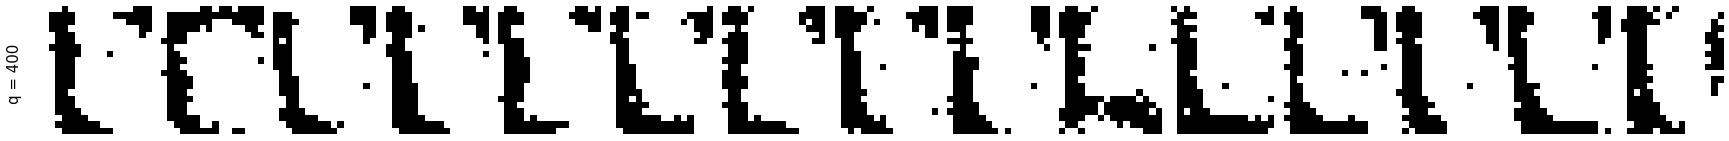

********************i = 450*****************


<Figure size 432x288 with 0 Axes>

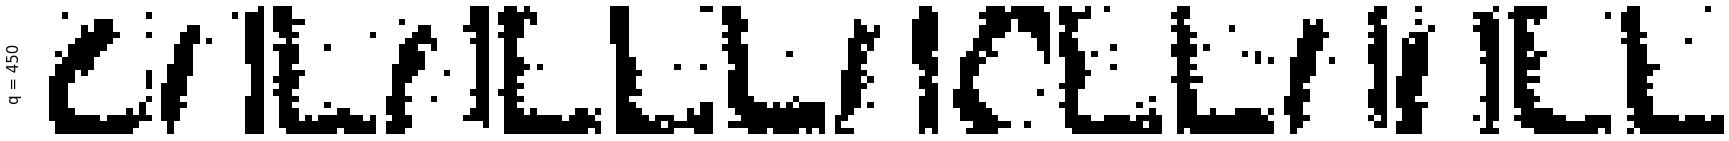

********************i = 500*****************


<Figure size 432x288 with 0 Axes>

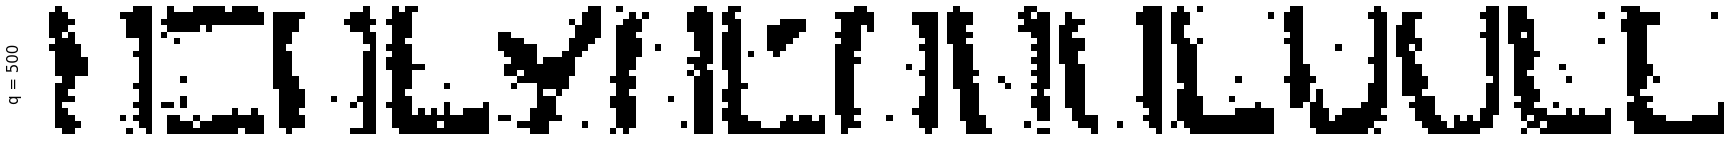

********************i = 550*****************


<Figure size 432x288 with 0 Axes>

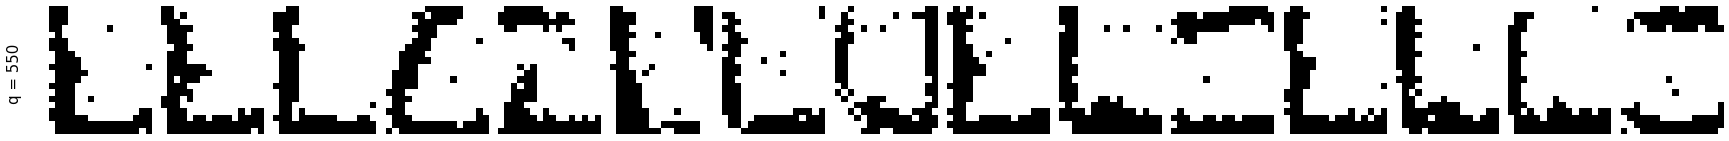

********************i = 600*****************


<Figure size 432x288 with 0 Axes>

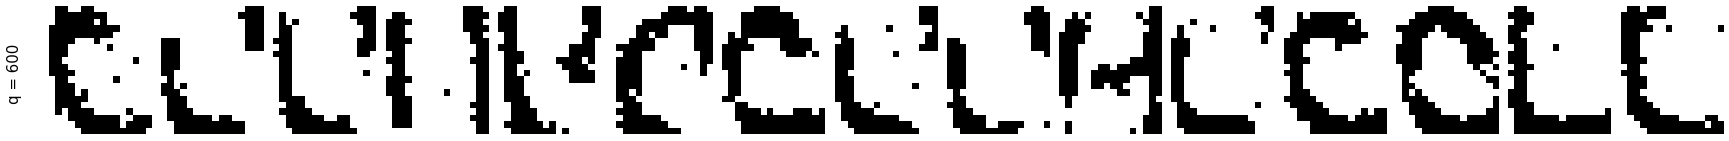

********************i = 650*****************


<Figure size 432x288 with 0 Axes>

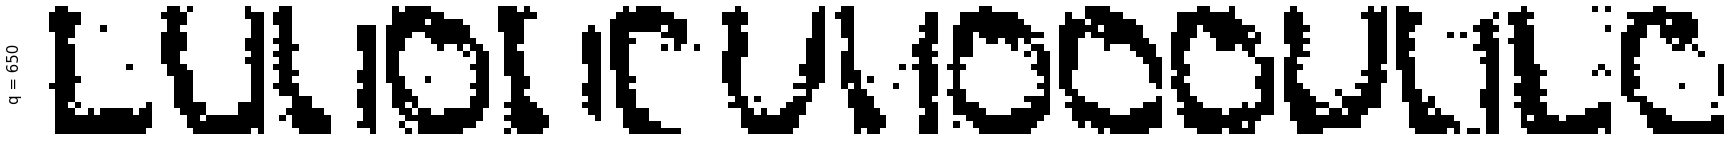

********************i = 700*****************


<Figure size 432x288 with 0 Axes>

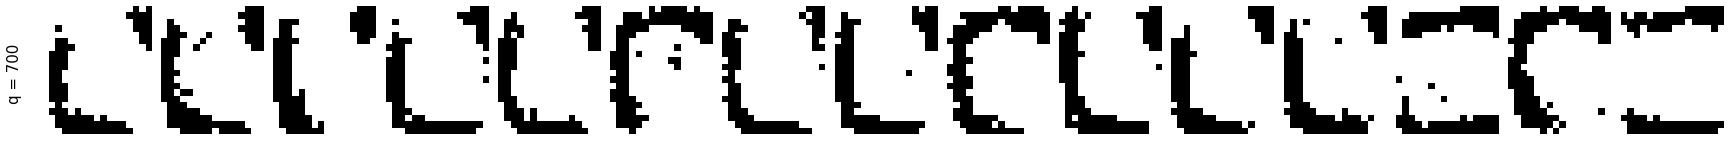

********************i = 750*****************


<Figure size 432x288 with 0 Axes>

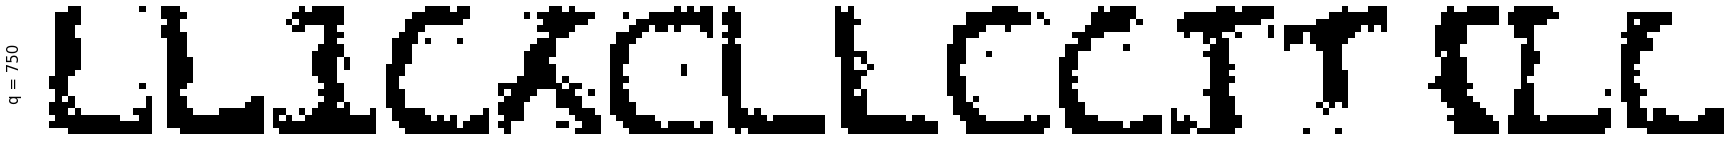

********************i = 800*****************


<Figure size 432x288 with 0 Axes>

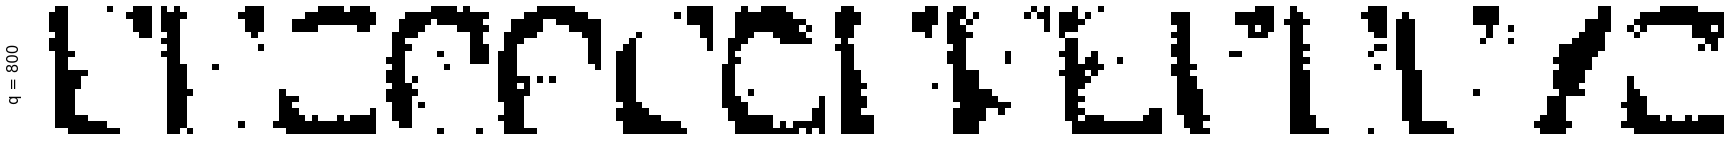

********************i = 850*****************


<Figure size 432x288 with 0 Axes>

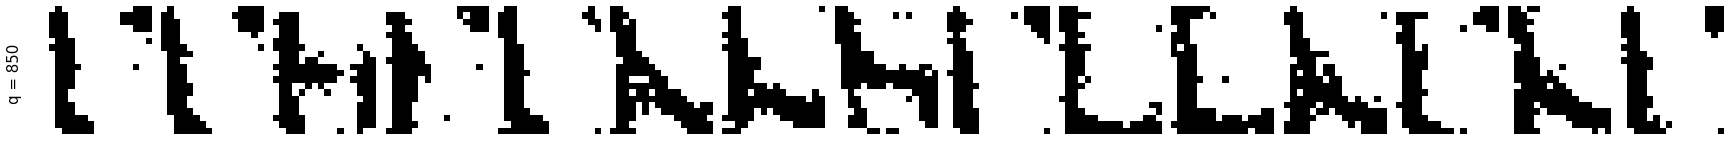

********************i = 900*****************


<Figure size 432x288 with 0 Axes>

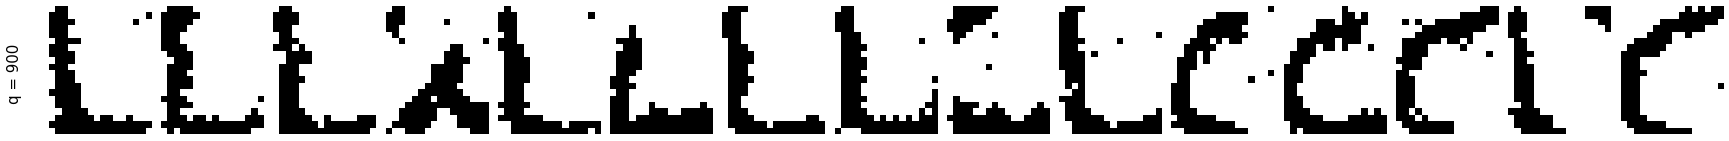

********************i = 950*****************


<Figure size 432x288 with 0 Axes>

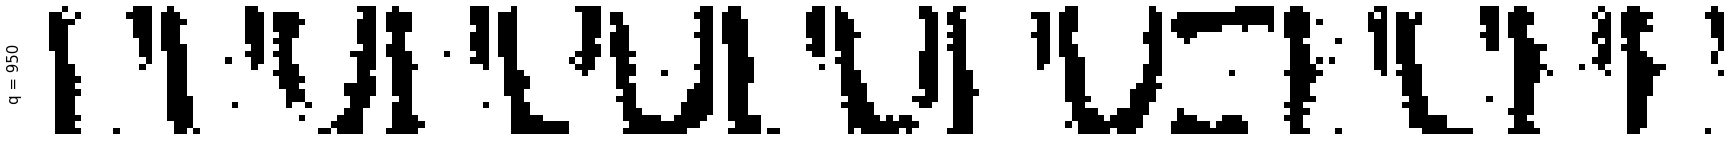

In [ ]:
x = lire_alpha_digit([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])#0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
param = np.arange(50,1000,50)
all_err = []
for i in param:
  print("********************i = {}*****************".format(i))
  model = RBM(p,i)  
  model, err, bic = train(model, x, epoch, lr, minibatch)
  all_err.append([i,err,bic])
  generer_image_RBM(model,1000,15)

In [ ]:
all_err = np.array(all_err)

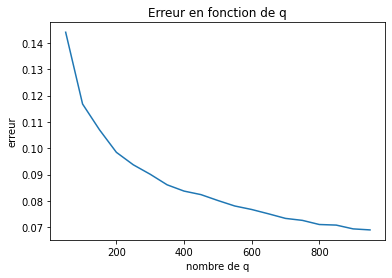

In [ ]:
plt.plot(all_err[:,0], all_err[:,1])
plt.xlabel("nombre de q")
plt.ylabel("erreur")
plt.title('Erreur en fonction de q')
plt.show()

In [ ]:
all_err

array([[ 5.00000000e+01,  1.44069161e-01, -7.26339706e+04],
       [ 1.00000000e+02,  1.16792758e-01, -4.68977015e+04],
       [ 1.50000000e+02,  1.07005588e-01, -4.24654652e+04],
       [ 2.00000000e+02,  9.84346559e-02, -4.50029927e+04],
       [ 2.50000000e+02,  9.36963493e-02, -3.74889667e+04],
       [ 3.00000000e+02,  9.01010560e-02, -4.01105658e+04],
       [ 3.50000000e+02,  8.60912700e-02, -3.59416385e+04],
       [ 4.00000000e+02,  8.37063364e-02, -3.19805412e+04],
       [ 4.50000000e+02,  8.23687476e-02, -3.56670978e+04],
       [ 5.00000000e+02,  8.01314675e-02, -3.26132492e+04],
       [ 5.50000000e+02,  7.80434691e-02, -3.30379351e+04],
       [ 6.00000000e+02,  7.67129203e-02, -3.40697066e+04],
       [ 6.50000000e+02,  7.50625406e-02, -2.88437261e+04],
       [ 7.00000000e+02,  7.33283034e-02, -2.52426213e+04],
       [ 7.50000000e+02,  7.25785694e-02, -3.52490131e+04],
       [ 8.00000000e+02,  7.10071842e-02, -3.01770157e+04],
       [ 8.50000000e+02,  7.07858109e-02

In [ ]:
np.argmax(all_err[:,2])

18

In [ ]:
all_err[np.argmax(all_err[:,2]),:]

array([ 9.50000000e+02,  6.89521613e-02, -2.51051942e+04])

In [ ]:
np.argmin(all_err[:,2])

0

<Figure size 432x288 with 0 Axes>

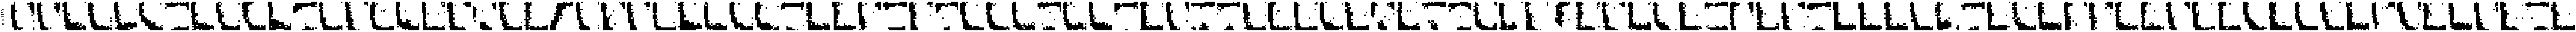

In [ ]:
mod = RBM(p,1150)
mod, err, bic = train(mod, x, epoch, lr, minibatch)
generer_image_RBM(mod,1000,100)

In [ ]:
mod0 = RBM(p,150)
mod0, err, bic = train(mod0, x, epoch, lr, minibatch)
generer_image_RBM(mod0,1000,50)

<Figure size 432x288 with 0 Axes>

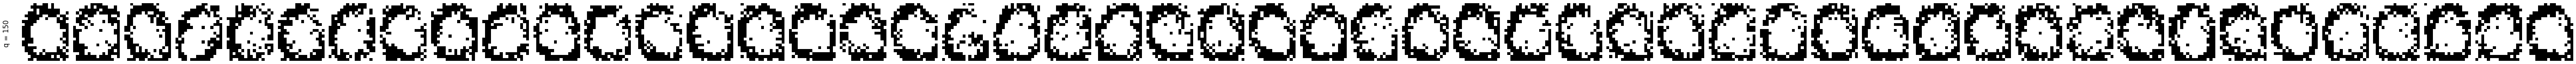

In [ ]:
generer_image_RBM(mod0,1000,50)


<Figure size 432x288 with 0 Axes>

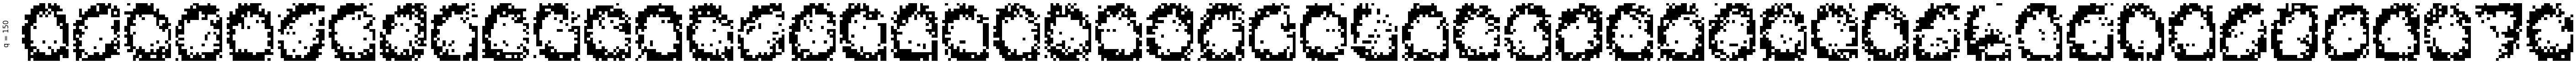

In [ ]:
generer_image_RBM(mod0,1000,50)

<Figure size 432x288 with 0 Axes>

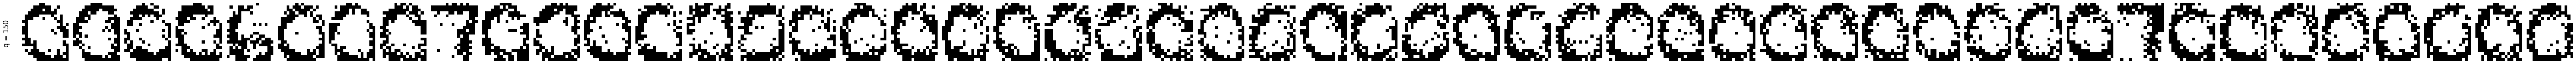

In [ ]:
generer_image_RBM(mod0,1000,50)

<Figure size 432x288 with 0 Axes>

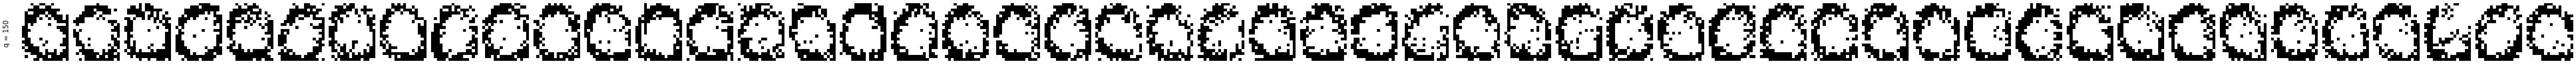

In [ ]:
generer_image_RBM(mod0,1000,50)


<Figure size 432x288 with 0 Axes>

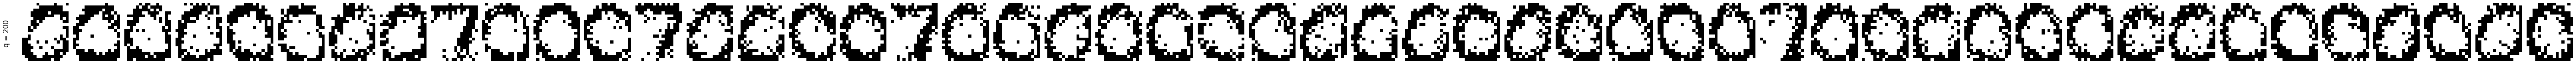

In [ ]:
mod_ = RBM(p,200)
mod_, err, bic = train(mod_, x, epoch, lr, minibatch)
generer_image_RBM(mod_,1000,50)

<Figure size 432x288 with 0 Axes>

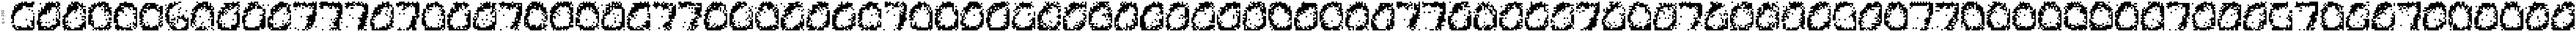

In [ ]:
mod = RBM(p,250)
mod, err, bic = train(mod, x, epoch, lr, minibatch)
generer_image_RBM(mod,1000,100)

<Figure size 432x288 with 0 Axes>

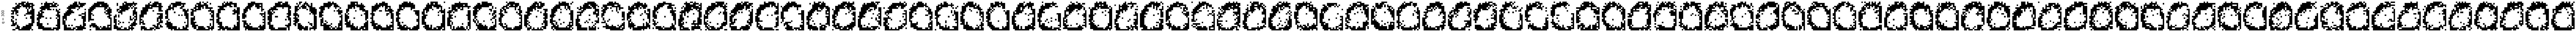

In [ ]:
mod = RBM(p,300)
mod, err, bic = train(mod, x, epoch, lr, minibatch)
generer_image_RBM(mod,1000,100)

<Figure size 432x288 with 0 Axes>

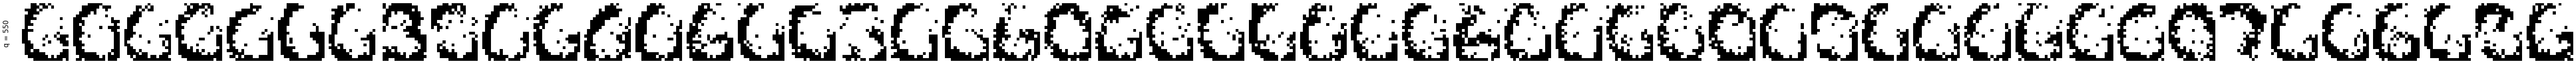

In [ ]:
mod2 = RBM(p,550)
mod2, err2, bic2 = train(mod2, x, epoch, lr, minibatch)
generer_image_RBM(mod2,1000,50)

<Figure size 432x288 with 0 Axes>

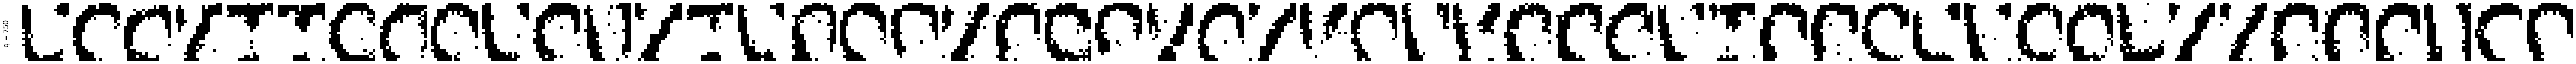

In [ ]:
mod3 = RBM(p,750)
mod3, err3, bic3 = train(mod3, x, epoch, lr, minibatch)
generer_image_RBM(mod3,1000,50)

<Figure size 432x288 with 0 Axes>

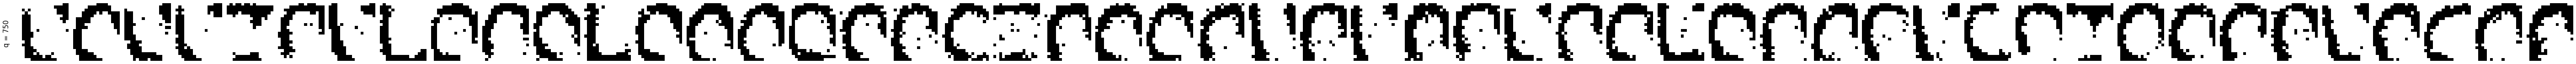

In [ ]:
generer_image_RBM(mod3,1000,50)

<Figure size 432x288 with 0 Axes>

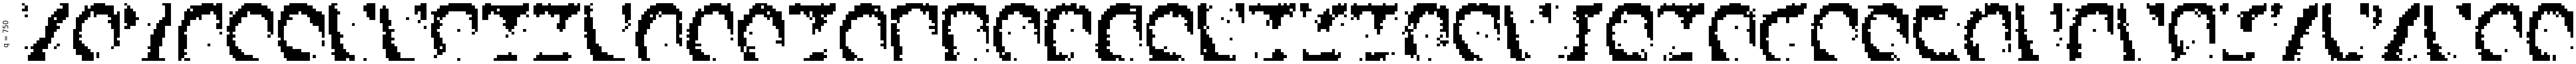

In [ ]:
generer_image_RBM(mod3,1000,50)

<Figure size 432x288 with 0 Axes>

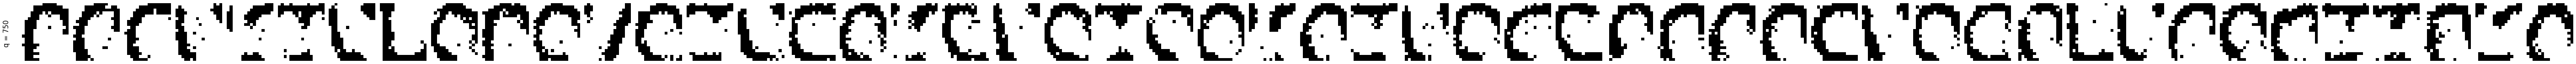

In [ ]:
generer_image_RBM(mod3,1000,50)
